# Comparing Inlining for Size Policy Trained on Crispy Doom to Default Heuristic
Sam Keyser
Spring '24
---

In [1]:
import pandas as pd

perf_report = 'cdoom-policy-default.report'

In [2]:
df = pd.read_csv(perf_report, names=['module', 'key', 'default', 'policy'])
df.head()

,module,key,default,policy
0,am_map.o,default,15906,15870
1,hu_stuff.o,default,6829,6797
2,p_doors.o,default,7428,7428
3,p_enemy.o,default,25659,25659
4,g_game.o,default,20357,20357


In [15]:
print('average module size =', df['default'].mean())

average module size = 10328.331428571428


In [16]:
# find all instances where we actually did better!
better = df['default'] > df['policy']
print(better.sum(), 'modules did better than default')

30 modules did better than default


The modules which did better than default:

In [4]:
df[better]['module']

0        am_map.o
1      hu_stuff.o
5       p_setup.o
8        am_map.o
11      p_setup.o
13       am_map.o
17      p_setup.o
20       am_map.o
23      p_setup.o
24      p_setup.o
26       am_map.o
34        p_map.o
40        p_map.o
45        p_map.o
52        p_map.o
59        p_map.o
64        p_map.o
69        p_map.o
74        p_map.o
113    sn_sonix.o
121    sn_sonix.o
136      am_map.o
141      am_map.o
145     p_setup.o
146      am_map.o
147    hu_stuff.o
256    hu_stuff.o
259    hu_stuff.o
312     p_setup.o
315     p_setup.o
Name: module, dtype: object

Lets look at how we did in general:

<Axes: title={'center': 'Delta-Size (B) of Modules for Default vs. Policy for CDoom\n(all modules)'}, xlabel='default size - policy size (B)', ylabel='Frequency'>

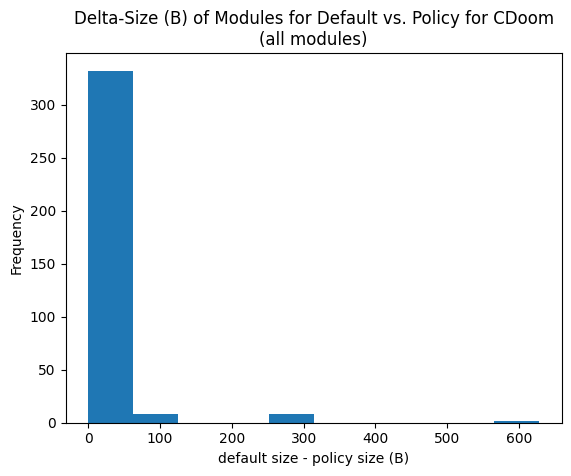

In [12]:
(df['default'] - df['policy'])\
    .plot\
    .hist(xlabel='default size - policy size (B)',
          title='Delta-Size (B) of Modules for Default vs. Policy for CDoom\n(all modules)')

<Axes: title={'center': 'Delta-Size (B) of Modules for Default vs. Policy for CDoom\n(only better modules)'}, xlabel='default size - policy size (B)', ylabel='Frequency'>

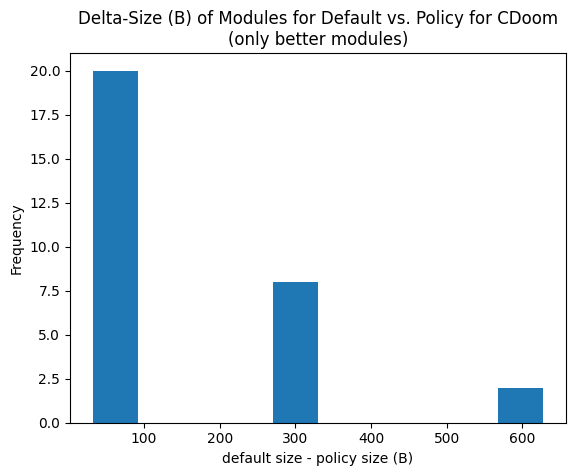

In [14]:
(df[better]['default'] - df[better]['policy'])\
    .plot\
    .hist(xlabel='default size - policy size (B)',
          title='Delta-Size (B) of Modules for Default vs. Policy for CDoom\n(only better modules)')